In [1]:
import krpc
import datetime
import time
%run -i '../Common.ipynb'
#conn = krpc.connect(name='laptop0', address='192.168.1.9')
conn = krpc.connect(name='laptop0', address='goetz.homenet.org')
ksc = conn.space_center

In [2]:
ksc.active_vessel.orbit.apoapsis

-18402345.41349161

In [3]:
%load_ext autoreload
%autoreload 2
sys.path.append('home/goetz/local/lib64/python')
%aimport ksp

In [4]:
π = np.pi
deg = π/180

def test_close(name,x,y,rtol=1e-5,atol=1e-5):
    if not np.isclose(x,y,rtol=rtol,atol=atol):
        print(name+': {} != {}'.format(x,y))

In [5]:
def orbit_from_krpc_orbit(ksc,obt):
    body = ksp.CelestialBody(
        name = obt.body.name,
        gravitational_parameter = obt.body.gravitational_parameter,
        equatorial_radius = obt.body.equatorial_radius,
        rotational_speed = obt.body.rotational_speed)
    return ksp.Orbit(
        t0 = ksc.ut,
        i  = obt.inclination,
        Ω  = obt.longitude_of_ascending_node,
        ω  = obt.argument_of_periapsis,
        e  = obt.eccentricity,
        a  = obt.semi_major_axis,
        M0 = obt.mean_anomaly_at_epoch,
        body = body)

In [20]:
vessel = ksc.active_vessel
obt = vessel.orbit
obtrf = obt.body.reference_frame
f = vessel.flight(obtrf)
o = orbit_from_krpc_orbit(ksc,obt)

print('celestial body:',obt.body.name)
print('orbit type:',o.orbit_type)
test_close('    ap',o.apoapsis, obt.apoapsis, 1e-3)
test_close('    pe',o.periapsis,obt.periapsis, 1e-2)
test_close('ap alt',o.apoapsis_altitude, obt.apoapsis_altitude, 1e-3)
test_close('pe alt',o.periapsis_altitude, obt.periapsis_altitude, 1e-3)
test_close('period',o.period, obt.period, 1e-3)
test_close('     b',o.semi_minor_axis, obt.semi_minor_axis, 1e-3)
test_close('     M',o.mean_anomaly_at_epoch, obt.mean_anomaly, 1e-3, 1e-3)
test_close('     r',o.radius_at_epoch, obt.radius, 1e-3)

# KRPC's orbital speed is incorrect
#test_close(' speed',o.speed_at_epoch, obt.speed)

print('true anomaly:',o.true_anomaly_at_epoch/deg)
print('lon of pe:',(o.longitude_of_periapsis + 2*π)/deg)
#print('orbital speed:',o.speed(t))

test_close('lat',o.latitude_at_epoch/deg,f.latitude, rtol=1e-2, atol=1e-3)
test_close('lon',o.longitude_at_epoch/deg,f.longitude, rtol=1e-3)
print('Δlon:',f.longitude-o.longitude_at_epoch/deg)

for t in np.linspace(o.epoch,o.epoch+5*60*60,5):
    print('t',t)
    print('   ',o.position_at_time(t))

celestial body: Kerbin
orbit type: hyperbolic
period: nan != 88283.81891106529
     b: -3563129.736977171 != nan
true anomaly: -155.330184374
lon of pe: 600.746150129
Δlon: 0.0250376590445
t 34056930.3825
    [  5856249.88813085  68821439.68663348  -5956195.89597149]
t 34061430.3825
    [  5442489.78441809  65669407.12749282  -5698903.3211058 ]
t 34065930.3825
    [  5027704.57194335  62505013.10524756  -5440538.06409699]
t 34070430.3825
    [  4612086.19949006  59330268.01155037  -5181271.89185187]
t 34074930.3825
    [  4195791.5325675   56146829.34715357  -4921246.56848267]


In [5]:
h∞ = np.inf

SyntaxError: invalid character in identifier (<ipython-input-5-2f245d6f426f>, line 1)

In [123]:
deg = 180/π
vessel = ksc.active_vessel
obt = vessel.orbit
obtrf = obt.body.reference_frame
obtorf = obt.body.orbital_reference_frame
obtnrrf = obt.body.non_rotating_reference_frame
t = ksc.ut
o = KeplerOrbit(obt)
f = vessel.flight(obtrf)

def longitude(kepler_orbit, t=None):
    x,y,z = o.position(t)
    return arctan2(y,x) % (2*π)

def surface_longitude(kepler_orbit, t=None):
    t = t if t is not None else self.epoch
    l = self.longitude(t)
    l0 = self.body.longitude(t)
    return ((l - l0) % (2*π)) - π/2

print('true surface lon:',f.longitude)
print('surface lon:', o.surface_longitude() * deg)

true surface lon: 130.80228096578418
surface lon: -89.1974099096


In [36]:
deg = π/180
km=1000
vessel = ksc.active_vessel
obt = vessel.orbit
o = orbit_from_krpc_orbit(ksc,obt)
print('a:',o.semi_major_axis/km)
print('μ: {:g}'.format(o.body.gravitational_parameter))
print('period:',o.period/(60*60*6))

a: 24944.6713196
μ: 3.5316e+12
period: 19.2844403477


In [39]:
for i in range(10):
    vessel = ksc.active_vessel
    obt = vessel.orbit
    o = orbit_from_krpc_orbit(ksc,obt)
    t = o.epoch
    tpe = o.time_to_periapsis_at_epoch
    print(o.periapsis)
    print(o.radius_at_time(t+tpe))

689797.254712
9457208.88516
689828.403896
9457224.50723
689852.367521
9457189.77591
689769.619698
9457206.60089
689809.543587
9457194.75954
689937.223972
9457173.61315
689872.592466
9457130.43865
689823.59869
9457221.21237
689818.785329
9457200.25531
689827.387697
9457122.47391


time to periapsis: 3.9004764655
r: [ 9878.57648686  9786.85605096  9695.23140605  9603.70530576  9512.28060656
  9420.96027243  9329.74737979  9238.64512272  9147.65681846  9056.78591313]
Orbit(
    i  = 0.14149227768205455,
    Ω  = 3.977254620789031,
    ω  = 0.22395653996553322,
    e  = 1.0779572208620696,
    a  = -8855744.039847286,
    h  = 2250840699.4644012,
    M0 = -6.0078569863130475,
    θ0 = -2.7106861342757917,
    x0 = [  5903659.81295188  69192111.97255471  -5986535.48014803],
    v0 = [  5903659.81295188  69192111.97255471  -5986535.48014803],
    t0 = 34056398.642449796,
    body = CelestialBody(
    equatorial_radius = 600000.0,
    gravitational_parameter = 3531600035840.0,
    rotational_speed = 0.0002908894093707204,
)
,)



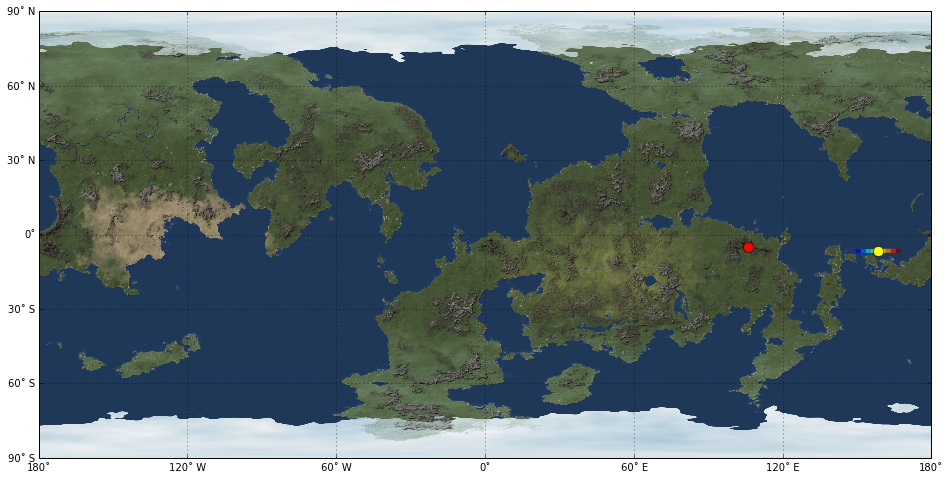

In [36]:
deg = π/180
km=1000
vessel = ksc.active_vessel
obt = vessel.orbit
o = orbit_from_krpc_orbit(ksc,obt)

t = o.epoch
tpe = o.time_to_periapsis_at_epoch
npoints = 10
tmin = t + tpe - 10*60
tmax = tmin + 20*60

#tmin = t - 0.25*o.period
#tmax = t + 1.25*o.period

tt = np.linspace(tmin,tmax,npoints)
lat = o.latitude_at_time(tt) / deg
lon = o.longitude_at_time(tt) / deg
r = o.radius_at_time(tt)
rmin,rmax = r.min(),r.max()
r = (r - rmin) / (rmax - rmin)

print('time to periapsis:',tpe/(60*60*6))
print('r:',o.radius_at_time(tt)/km)

mview = ksp.MapView(o.body)

fig,ax = pyplot.subplots(figsize=(16,8))
mview.plot_basemap(ax)
_=ksp.MapView.plot_track(ax,lat,lon,r)
_=ksp.MapView.plot_marker(ax,
    o.latitude_at_epoch/deg,
    o.longitude_at_epoch/deg)
_=ksp.MapView.plot_marker(ax,
    o.latitude_at_time(t+tpe)/deg,
    o.longitude_at_time(t+tpe)/deg,
    color='yellow')
#fig.savefig('/home/goetz/dres_ground_track.png')

print(o)

In [24]:
t0 = ksc.ut
time.sleep(60)
t1 = ksc.ut
print(t0,t1)
print(t1-t0)

34472726.99832755 34472771.27833481
44.280007258057594


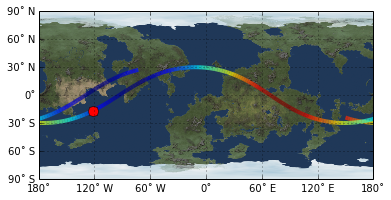

In [2]:
import wernher
from matplotlib import pyplot
import numpy as np

π = np.pi
deg = π/180
km = 1000

body = wernher.CelestialBody(
    name = 'kerbin',
    gravitational_parameter = 3.5316e12,
    equatorial_radius = 600*km,
    rotational_speed = 2*π/21600)
orbit = wernher.Orbit(
    t0 = 0,
    i  = 30*deg,
    Ω  = 0*deg,
    ω  = 15*deg,
    pe_alt  = 100*km,
    ap_alt  = 200*km,
    M0 = -45*deg,
    body = body)

# ground track consists of 200 points
npoints = 200

# start in the past by 1/4 of the orbital period
tmin = orbit.epoch - 0.25*orbit.period

# plot 1.5 periods of ground track
tmax = tmin + 1.5*orbit.period

# array of times - evenly spaced
tt = np.linspace(tmin,tmax,npoints)

# array of lattitude and longitudes, converted to degrees
lat = orbit.latitude_at_time(tt) / deg
lon = orbit.longitude_at_time(tt) / deg

# calculate radius and normalize to the range [0,1]
r = orbit.radius_at_time(tt)
rmin,rmax = r.min(),r.max()
r = (r - rmin) / (rmax - rmin)

# create figure and add map view, track and position marker
fig,ax = pyplot.subplots()
mview = wernher.MapView(orbit.body)
mview.zoomlevel = 1
mview.plot_basemap(ax)
tk = wernher.MapView.plot_track(ax,lat,lon,r)
mk = wernher.MapView.plot_marker(ax,
    orbit.latitude_at_epoch/deg,
    orbit.longitude_at_epoch/deg)

# show plot in new window
fig.savefig('kerbin_ground_track.png')
pyplot.show()

In [42]:
0.2 * 10*6*60*60

43200.0

In [87]:
tt = []
lat = []
lon = []
data = []

vessel = ksc.active_vessel
obt = vessel.orbit
obtrf = obt.body.reference_frame

for step in range(100):
    t = ksc.ut
    o = KeplerOrbit(obt)
    f = vessel.flight(obtrf)
    
    tt.append(t)
    lat.append(f.latitude)
    lon.append(f.longitude)
    data.append(o)
    
    time.sleep(1)

KeyboardInterrupt: 

In [88]:
print([d.radius() for d in data])

[776672.11117199005, 776828.18216800061, 776971.94243456703, 777133.33589239896, 777279.47086229001, 777431.24865913985, 777585.67820871738, 777721.99963581725, 777875.78521612962, 778011.54137093609, 778173.5089348125, 778326.28637226298, 778481.65147731325, 778633.74022052123]


In [134]:
i = 32.223*π/180
ω = 57.836*π/180
λ1 = -142.483*π/180
Ω = 111.892*π/180
ν = 25.794*π/180
l = ω + ν
λ2 = (np.arctan(np.cos(i)*np.tan(l)) + λ1)
Δλ = λ2 - λ1
print(λ2 * 180/π, Δλ * 180/π)


-60.0004776968 82.4825223032
